In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df2=pd.read_csv('customer_churn_dataset-testing-master.csv')

In [72]:
df1=pd.read_csv('customer_churn_dataset-training-master.csv')

In [73]:
df1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [74]:
df2.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [75]:
df1.shape

(440833, 12)

In [76]:
df2.shape

(64374, 12)

In [77]:
df=pd.merge(df1,df2,how='outer')

/tmp/ipython-input-3605883424.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df=pd.merge(df1,df2,how='outer')


In [78]:
df.shape

(505207, 12)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [80]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [81]:
df=df.drop('CustomerID',axis=1)

In [82]:
cat_col=['Gender','Subscription Type','Contract Length']

In [83]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
2,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
3,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
4,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [84]:
num_col=['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction','Churn']

In [85]:
for col in cat_col:
  df[col]=df[col].fillna(df[col].mode()[0])

In [86]:
for col in num_col:
  # Convert the column to numeric, coercing errors to NaN
  df[col] = pd.to_numeric(df[col], errors='coerce')
  # Now fill NaN values with the mean of the (now numeric) column
  df[col] = df[col].fillna(df[col].mean())

In [87]:
df.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0
Last Interaction,0


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.shape

(505207, 11)

In [90]:
df=df.drop_duplicates()

In [91]:
df.shape

(505207, 11)

In [92]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
2,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
3,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
4,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


<Axes: xlabel='Support Calls', ylabel='Churn'>

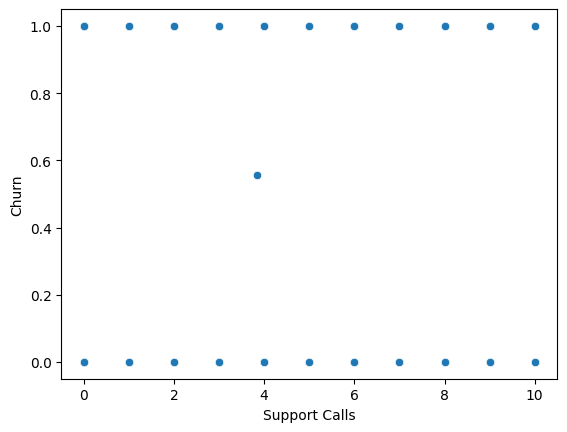

In [93]:
sns.scatterplot(x='Support Calls',y='Churn',data=df)

<Axes: xlabel='Payment Delay', ylabel='Churn'>

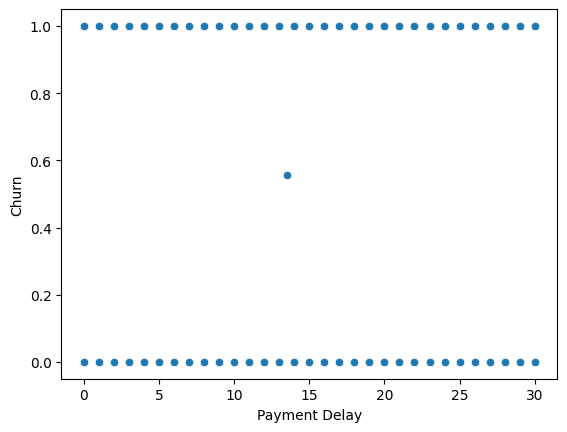

In [94]:
sns.scatterplot(x='Payment Delay',y='Churn',data=df)

<Axes: xlabel='Total Spend', ylabel='Churn'>

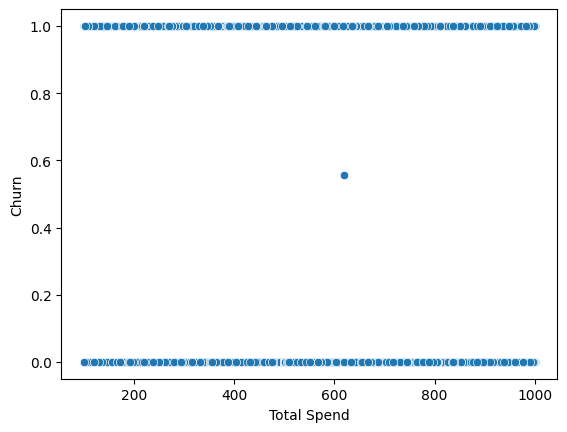

In [95]:
sns.scatterplot(x='Total Spend',y='Churn',data=df)

<Axes: xlabel='Last Interaction', ylabel='Churn'>

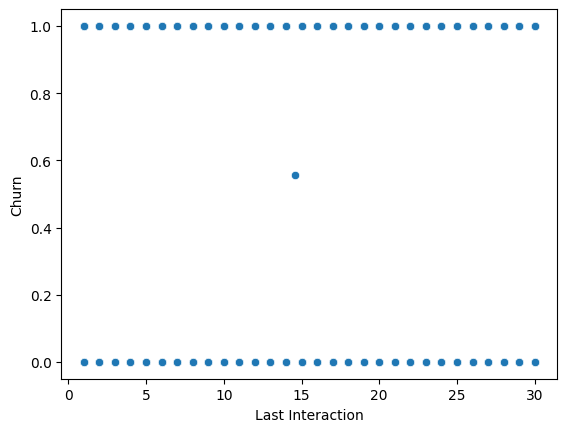

In [96]:
sns.scatterplot(x='Last Interaction',y='Churn',data=df)

<Axes: xlabel='Churn', ylabel='Age'>

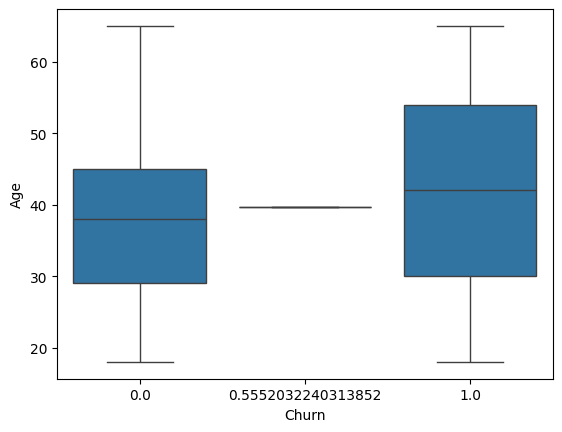

In [97]:
sns.boxplot(x='Churn',y='Age',data=df)

<Axes: xlabel='Churn', ylabel='Usage Frequency'>

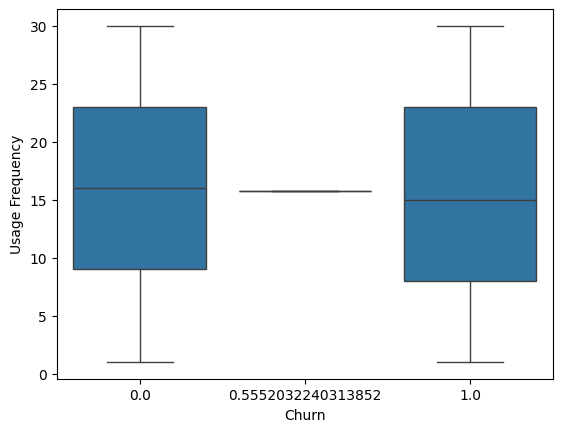

In [98]:
sns.boxplot(x='Churn',y='Usage Frequency',data=df)

<Axes: xlabel='Churn', ylabel='Payment Delay'>

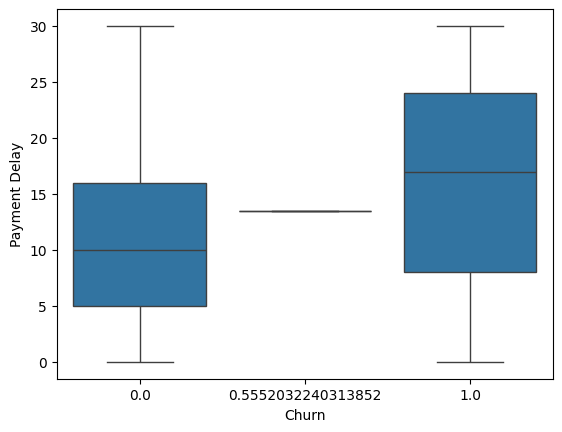

In [99]:
sns.boxplot(x='Churn',y='Payment Delay',data=df)

<Axes: xlabel='Churn', ylabel='Total Spend'>

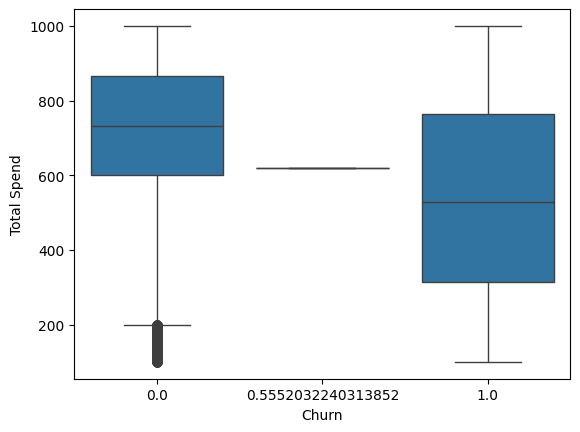

In [100]:
sns.boxplot(x='Churn',y='Total Spend',data=df)

<Axes: >

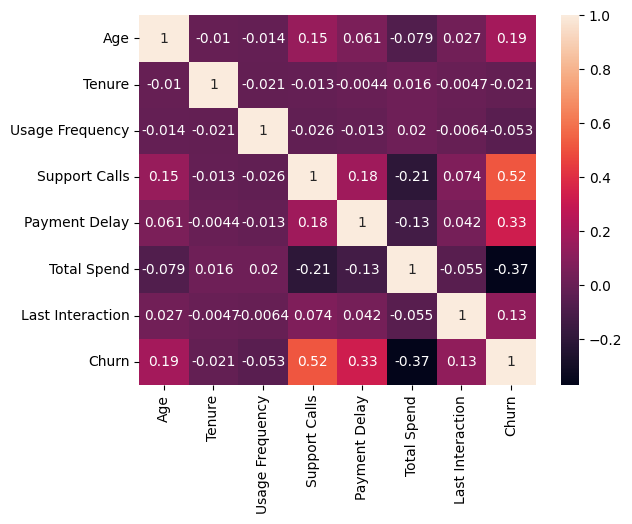

In [101]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [102]:
col=['Tenure','Usage Frequency']

In [103]:
x=df.drop(['Churn','Tenure','Usage Frequency'],axis=1)
y=df['Churn']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
encoder=LabelEncoder()

In [108]:
for col in cat_col:
  x_train[col]=encoder.fit_transform(x_train[col])

In [109]:
for col in cat_col:
  x_test[col]=encoder.fit_transform(x_test[col])

In [110]:
x_train_dis=x_train.copy()

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
naive=GaussianNB()

In [114]:
y_train

,Churn
166878,1.0
245502,1.0
393559,0.0
146324,1.0
336556,0.0
...,...
259178,1.0
365838,0.0
131932,1.0
146867,1.0


In [115]:
# Convert y_train and y_test to integer labels (0 or 1) by rounding
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)

naive.fit(x_train,y_train)

GaussianNB()

In [116]:
naive_pred=naive.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [118]:
accuracy_score(y_test,naive_pred)

0.8579204687159795

In [119]:
train_naive=naive.predict(x_train)
trest_naive=naive.predict(x_test)
train_naive_acc=accuracy_score(y_train,train_naive)
test_naive_acc=accuracy_score(y_test,trest_naive)
print(train_naive_acc,test_naive_acc)

0.8581990028824861 0.8579204687159795


In [120]:
confusion_matrix(y_test,naive_pred)

array([[39366,  5569],
       [ 8787, 47320]])

In [121]:
print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     44935
           1       0.89      0.84      0.87     56107

    accuracy                           0.86    101042
   macro avg       0.86      0.86      0.86    101042
weighted avg       0.86      0.86      0.86    101042



In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
tree=DecisionTreeClassifier()

In [124]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [125]:
tree_pred=tree.predict(x_test)

In [126]:
accuracy_score(y_test,tree_pred)

0.8755566991943944

In [127]:
train_tree=tree.predict(x_train)
trest_tree=tree.predict(x_test)
train_tree_acc=accuracy_score(y_train,train_tree)
test_tree_acc=accuracy_score(y_test,trest_tree)
print(train_tree_acc,test_tree_acc)

0.9999975257629928 0.8755566991943944


In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
grid_params={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,20,1),
    'splitter':['best','random'],
    'min_samples_split':np.arange(1,20,1),
    'min_samples_leaf':np.arange(1,20,1),
}

In [130]:
rand_search=RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=grid_params,
    cv=5,
    n_iter=10,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42

  )

In [131]:
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=2)

In [132]:
best_model=rand_search.best_estimator_

In [133]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(12),
                       min_samples_leaf=np.int64(13),
                       min_samples_split=np.int64(2))

In [134]:
best_pred=best_model.predict(x_test)

In [135]:
accuracy_score(y_test,best_pred)

0.9344628966172482

In [136]:
train_tree=best_model.predict(x_train)
trest_tree=best_model.predict(x_test)
train_tree_acc=accuracy_score(y_train,train_tree)
test_tree_acc=accuracy_score(y_test,trest_tree)
print(train_tree_acc,test_tree_acc)

0.9347667413061497 0.9344628966172482


In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler=StandardScaler()

In [139]:
x_train_dis=scaler.fit_transform(x_train_dis)
x_test_dis=scaler.fit_transform(x_test_dis)

In [146]:
x_train_dis=pd.DataFrame(x_train_dis,columns=x_train.columns)
x_test_dis=pd.DataFrame(x_test_dis,columns=x_test.columns)

In [154]:
import pickle

In [155]:
with open('model.pkl','wb') as f:
  pickle.dump(best_model,f)

In [156]:
with open('encoder.pkl','wb') as f:
  pickle.dump(encoder,f)